In [ ]:
# como vimos anteriormente, si tenemos masas muy chiquitas el agujero negro desaparece. entonces, nos
# pondremos a resolver la ecuacion diferencial para masas grandes y sin considerar la contribucion de
# la radiacion de hawking 

In [2]:
from astropy import constants as ast
from astropy import units as u

m_sol = ast.M_sun.cgs.value   # masa del sol en gramos
G = ast.G.cgs.value           #constante de gravitacion universal en cgs
c = ast.c.cgs.value           #velocidad de la luz en cgs

m_sol

1.988409870698051e+33

In [3]:
from scipy import constants as sci
from scipy.constants import physical_constants

#cargamos las constantes que vayamos a usar en el calculo
t_planck = physical_constants["Planck time"][0]
pi = sci.pi

masa_planck = physical_constants["Planck mass"][0]
m_planck = masa_planck*(10**3) #masa de planck en gramos


In [4]:
#definimos nuestras constantes 
#m_0 = m_sol*10**4              # la masa en el momento en que se produce el bounce
x_b = 9*10**37                 # constante adimensional que me define a a_b con x_b < 10^38 
a_b = 1/x_b                     # constante del bounce
T_b = t_planck*10**25          # 10^3 < T_b / t_planck < 10^40 [s]    asi que elijo uno intermedio
lamb = 1.1056*10**(-56)        # constante cosmologica en cm^-2 
rho_0 = (lamb*c**2)/(8*pi*G)   # densidad de "hoy" en cgs. consideramos la densidad de vacio, que es la que domina

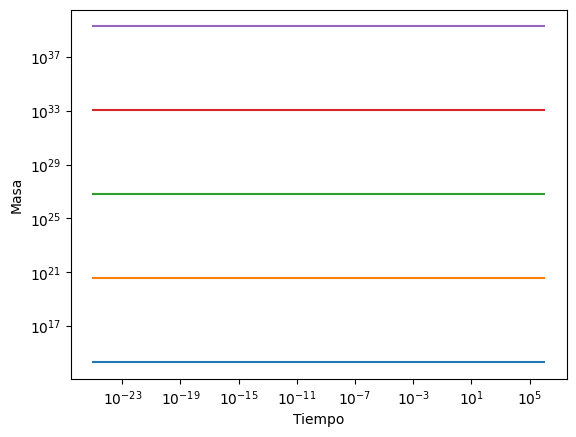

In [17]:
import numpy as np
from scipy.integrate import odeint
import matplotlib.pyplot as plt

# nuevamente defino el modelo, que en este caso son las dos contribuciones 

def model(M, t): 
    w = 1/3
    aux = 1+3*w*c**2
    A = (aux**(aux/(2*w*c**2)))/(4*w**(3/2)*c**3)
    rho = rho_0*a_b*(1+(t/T_b)**2)**(1/(3-3*w))
    P = w*(c**2)*rho
    
    dot_M_b = m_0*((2*a_b*t)/(3*(1-w)*T_b))*(1+(t/T_b)**2)**((-2-3*w)/(3*(1-w))) 
    dot_M_ac = 4*pi*A*G**2*c**(-5)*M**2*(c**2*rho-P)
    
    dMdt = dot_M_b + dot_M_ac
    
    return dMdt 


# mi condicion inicial es un rango de masas, de modo que 
masas = np.logspace(np.log10(10**(-19)*m_sol), np.log10(m_sol*10**6), 5) #usamos 10^-19 pues vemos de antes que ya no se evapora 

# los tiempos 
t = np.logspace(np.log10(10**-25), np.log10(10**6), 25)


resultados = []

for m_0 in masas:
    M = odeint(model, m_0, t)
    resultados.append(M)

plt.figure() 
for M in resultados:
    plt.plot(t, M)

plt.xlabel('Tiempo')
plt.ylabel('Masa')
plt.yscale('log')
plt.xscale('log')
plt.show()


estoy probando
[4.09802092e-31]
estoy probando
[4.10781247e-31]
estoy probando
[4.11760402e-31]
estoy probando
[1.02033107e-29]
estoy probando
[1.9994861e-29]
estoy probando
[2.97864113e-29]
estoy probando
[1.27701914e-28]
estoy probando
[2.25617414e-28]
estoy probando
[3.2353291e-28]
estoy probando
[1.30268727e-27]
estoy probando
[2.28183933e-27]
estoy probando
[3.26098736e-27]
estoy probando
[1.3051865e-26]
estoy probando
[2.28404357e-26]
estoy probando
[3.26249702e-26]
estoy probando
[1.2987036e-25]
estoy probando
[2.24850383e-25]
estoy probando
[3.15982135e-25]
estoy probando
[8.33073846e-25]
estoy probando
[7.67485199e-25]
estoy probando
[5.74909154e-25]
estoy probando
[6.06479311e-26]
estoy probando
[2.03737195e-26]
estoy probando
[1.00542968e-26]
estoy probando
[6.32445772e-28]
estoy probando
[2.06572644e-28]
estoy probando
[1.01227836e-28]
estoy probando
[6.32714731e-30]
estoy probando
[2.06601326e-30]
estoy probando
[1.01234722e-30]
estoy probando
[6.32717419e-32]
estoy proban

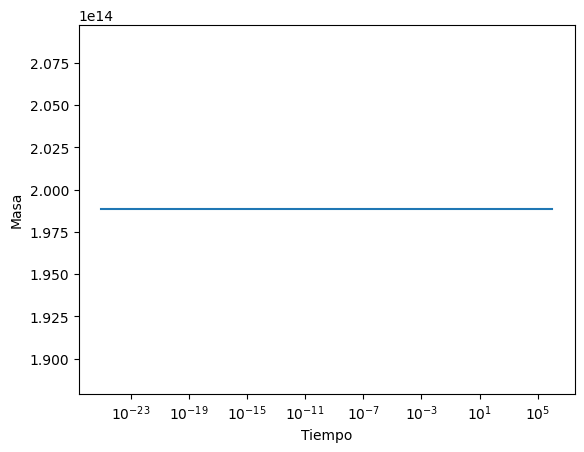

In [9]:
import numpy as np
from scipy.integrate import odeint
import matplotlib.pyplot as plt

# nuevamente defino el modelo, que en este caso son las dos contribuciones 

def model(M, t): 
    w = 1/3
    aux = 1+3*w*c**2
    A = (aux**(aux/(2*w*c**2)))/(4*w**(3/2)*c**3)
    rho = rho_0*a_b*(1+(t/T_b)**2)**(1/(3-3*w))
    P = w*(c**2)*rho
    
    dot_M_b = m_0*((2*a_b*t)/(3*(1-w)*T_b))*(1+(t/T_b)**2)**((-2-3*w)/(3*(1-w))) 
    dot_M_ac = 4*pi*A*G**2*c**(-5)*M**2*(c**2*rho-P)
    
    dMdt = dot_M_b + dot_M_ac
    print("estoy probando")
    print(dMdt)
    
    return dMdt 


# mi condicion inicial es un rango de masas, de modo que 
m_0 =10**(-19)*m_sol 

# los tiempos 
t = np.logspace(np.log10(10**-25), np.log10(10**6), 25)

# solve ODE
M = odeint(model,m_0,t)

print(M)

plt.plot(t, M)

plt.xlabel('Tiempo')
plt.ylabel('Masa')
#plt.yscale('log')
plt.xscale('log')
plt.show()
